In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [4]:
!pip install pyradiomics

     |████████████████████████████████| 163kB 8.9MB/s 
     |████████████████████████████████| 44.9MB 72kB/s 
     |████████████████████████████████| 40kB 7.4MB/s 


#Brain tumor classification using radiomics features using flair sequence.
Please download dataset from brats2018 challenge and upload in google drive

install radiomics library and extract some features

In [5]:
import os
import pandas as pd
import numpy as np
import logging
from radiomics import featureextractor
import radiomics
import six, numpy as np    
import SimpleITK as sitk

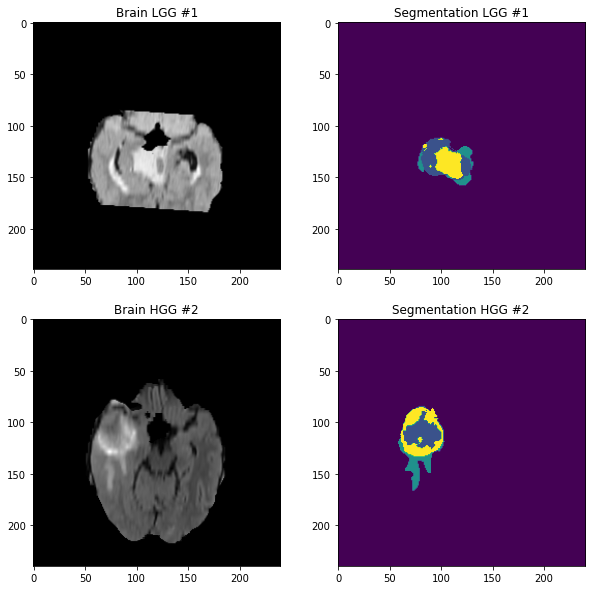

In [6]:
imagepath_1='/content/drive/My Drive/LGG/Brats18_2013_0_1/Brats18_2013_0_1_flair.nii.gz'
labelpath_1='/content/drive/My Drive/LGG/Brats18_2013_0_1/Brats18_2013_0_1_seg.nii.gz'

imagepath_2='/content/drive/My Drive/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii.gz'
labelpath_2='/content/drive/My Drive/HGG/Brats18_2013_10_1/Brats18_2013_10_1_seg.nii.gz'

import os
import SimpleITK as sitk
image_1 = sitk.ReadImage(imagepath_1)
label_1 = sitk.ReadImage(labelpath_1)
image_2 = sitk.ReadImage(imagepath_2)
label_2 = sitk.ReadImage(labelpath_2)




# Display the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
# First image
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image_1)[55,:,:], cmap="gray")
plt.title("Brain LGG #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(label_1)[55,:,:])        
plt.title("Segmentation LGG #1")

# Second image
plt.subplot(2,2,3)
plt.imshow(sitk.GetArrayFromImage(image_2)[55,:,:], cmap="gray")        
plt.title("Brain HGG #2")

plt.subplot(2,2,4)
plt.imshow(sitk.GetArrayFromImage(label_2)[55,:,:])        
plt.title("Segmentation HGG #2")

plt.show()


In [ ]:
# define some sitting before feature extraction
settings = {}
settings['binWidth'] = 25
settings['resampledPixelSpacing'] = None
settings['interpolator'] = 'sitkBSpline'
settings['verbose'] = True

# provide path of dataset for HGG and LGG class
# image path
impathH='/content/drive/My Drive/HGG'
listdrH=os.listdir(impathH)
# feature append as list
elongation = []
flatness = []
patient_id = []
elongation = []
flatness = []
majAL = []
minAL = []
threedimdiam = []
spher = []
surfArea = []
energ = []
entrop = []
kurt = []
mean = []
skew = []
cont = []
correl = []
idm = []
coarse = []
complexity = []
strength = []
y_labels = []
case_id=[]

for i in listdrH:
    highglom=os.path.join(impathH,i)
    imgh=os.path.join(highglom,i+'_flair'+'.nii') # we are only extracted t1 sequence features here
    maskh=os.path.join(highglom,i+'_seg'+'.nii') # load segmentation map
    img_h=sitk.ReadImage(imgh)
    mask_h=sitk.ReadImage(maskh)
    print(highglom)
    extractor = featureextractor.RadiomicsFeatureExtractor(**settings)
    #print(extractor.enableFeatureClassByName('glcm'))
    featureVector = extractor.execute(img_h, mask_h)
    #print(featureVector)
    elongation.append(featureVector['original_shape_Elongation'])
    flatness.append(featureVector['original_shape_Flatness'])
    majAL.append(featureVector['original_shape_MajorAxisLength'])
    minAL.append(featureVector['original_shape_MinorAxisLength'])
    threedimdiam.append(featureVector['original_shape_Maximum3DDiameter'])
    spher.append(featureVector['original_shape_Sphericity'])
    surfArea.append(featureVector['original_shape_SurfaceArea'])
    energ.append(featureVector['original_firstorder_Energy'])
    entrop.append(featureVector['original_firstorder_Entropy'])
    kurt.append(featureVector['original_firstorder_Kurtosis'])
    mean.append(featureVector['original_firstorder_Mean'])
    skew.append(featureVector['original_firstorder_Skewness'])
    cont.append(featureVector['original_glcm_Contrast'])
    correl.append(featureVector['original_glcm_Correlation'])
    idm.append(featureVector['original_glcm_Idm'])
    coarse.append(featureVector['original_ngtdm_Coarseness'])
    complexity.append(featureVector['original_ngtdm_Complexity'])
    strength.append(featureVector['original_ngtdm_Strength'])
    y_labels.append(1)
    case_id.append(i)

# define dictionary of extracted features
raw_data = {
    'elongation':elongation,
    'flatness':flatness,
    'major_axis_length':majAL,
    'minor_axis_length':minAL,
    'max_3D_diameter':threedimdiam,
    'sphericity':spher,
    'surface_area':surfArea,
    'energy':energ,
    'entropy':entrop,
    'kurtosis':kurt,
    'mean':mean,
    'skewness':skew,
    'contrast':cont,
    'correlation':correl,
    'inverse_diff_moment':idm,
    'coarseness':coarse,
    'complexity':complexity,
    'strength':strength,
    'y_labels':y_labels
}


# save to pandas dataframe
dfh = pd.DataFrame(raw_data, index = case_id)
dfh.head()

In [ ]:
# compute features for LGG
import os
import pandas as pd
import numpy as np
import logging
from radiomics import featureextractor
import radiomics
import six, numpy as np    
import SimpleITK as sitk

#from radiomics import getTestCase


settings = {}
settings['binWidth'] = 25
settings['resampledPixelSpacing'] = None
settings['interpolator'] = 'sitkBSpline'
settings['verbose'] = True

# image path
impathL='/content/drive/My Drive/LGG'
listdrL=os.listdir(impathL)

elongation = []
flatness = []
patient_id = []
elongation = []
flatness = []
majAL = []
minAL = []
threedimdiam = []
spher = []
surfArea = []
energ = []
entrop = []
kurt = []
mean = []
skew = []
cont = []
correl = []
idm = []
coarse = []
complexity = []
strength = []
y_labels = []
case_idl=[]
for j in listdrL:
    highgloml=os.path.join(impathL,j)
    imgl=os.path.join(highgloml,j+'_flair'+'.nii')
    maskl=os.path.join(highgloml,j+'_seg'+'.nii')
    img_l=sitk.ReadImage(imgl)
    mask_l=sitk.ReadImage(maskl)
    print(highgloml)
    extractor = featureextractor.RadiomicsFeatureExtractor(**settings)
    #print(extractor.enableFeatureClassByName('glcm'))
    featureVector = extractor.execute(img_l, mask_l)
    #print(featureVector)
    elongation.append(featureVector['original_shape_Elongation'])
    flatness.append(featureVector['original_shape_Flatness'])
    majAL.append(featureVector['original_shape_MajorAxisLength'])
    minAL.append(featureVector['original_shape_MinorAxisLength'])
    threedimdiam.append(featureVector['original_shape_Maximum3DDiameter'])
    spher.append(featureVector['original_shape_Sphericity'])
    surfArea.append(featureVector['original_shape_SurfaceArea'])
    energ.append(featureVector['original_firstorder_Energy'])
    entrop.append(featureVector['original_firstorder_Entropy'])
    kurt.append(featureVector['original_firstorder_Kurtosis'])
    mean.append(featureVector['original_firstorder_Mean'])
    skew.append(featureVector['original_firstorder_Skewness'])
    cont.append(featureVector['original_glcm_Contrast'])
    correl.append(featureVector['original_glcm_Correlation'])
    idm.append(featureVector['original_glcm_Idm'])
    coarse.append(featureVector['original_ngtdm_Coarseness'])
    complexity.append(featureVector['original_ngtdm_Complexity'])
    strength.append(featureVector['original_ngtdm_Strength'])
    y_labels.append(0)
    case_idl.append(j)

raw_data = {
    'elongation':elongation,
    'flatness':flatness,
    'major_axis_length':majAL,
    'minor_axis_length':minAL,
    'max_3D_diameter':threedimdiam,
    'sphericity':spher,
    'surface_area':surfArea,
    'energy':energ,
    'entropy':entrop,
    'kurtosis':kurt,
    'mean':mean,
    'skewness':skew,
    'contrast':cont,
    'correlation':correl,
    'inverse_diff_moment':idm,
    'coarseness':coarse,
    'complexity':complexity,
    'strength':strength,
    'y_labels':y_labels
}

# save to pandas dataframe
dfl = pd.DataFrame(raw_data, index = case_idl)
dfl.head()

In [ ]:
# combine two class features
df_combine = pd.concat([dfh, dfl], axis = 0)
# drop labels
y = df_combine[['y_labels']]
df= df_combine.drop(['y_labels'], axis=1)

# prerpocess and normalize labels
from sklearn import preprocessing

case_idnew1=case_id+case_idl

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled, index = case_idnew1)
normalized_df.columns = df.columns

normalized_df = pd.concat([normalized_df, y], axis = 1)
normalized_df.head()

In [7]:
!unzip dataflair.zip

Archive:  dataflair.zip
   creating: dataflair/
  inflating: dataflair/dataflair.pkl  


In [8]:
import pandas as pd
shuffled=pd.read_pickle('/content/drive/My Drive/dataflair/dataflair.pkl')
shuffled.head()

,elongation,flatness,major_axis_length,minor_axis_length,max_3D_diameter,sphericity,surface_area,energy,entropy,kurtosis,mean,skewness,contrast,correlation,inverse_diff_moment,coarseness,complexity,strength,y_labels
Brats18_CBICA_AOO_1,0.741400,0.739418,0.177716,0.358718,0.353375,0.220177,0.182370,0.000043,0.473478,0.038312,0.013488,0.731354,0.002484,0.865473,0.364279,0.009479,0.000119,0.001652,1
Brats18_CBICA_AQZ_1,0.666813,0.501592,0.232606,0.428217,0.397001,0.224247,0.242607,0.000049,0.398513,0.077805,0.011569,0.621100,0.001681,0.727882,0.454114,0.004026,0.000082,0.000600,1
Brats18_CBICA_BFB_1,0.493496,0.472278,0.271415,0.394518,0.393223,0.075891,0.257350,0.000055,0.442867,0.062727,0.018377,0.811175,0.001805,0.814982,0.401484,0.009269,0.000177,0.002801,1
Brats18_TCIA04_479_1,0.793477,0.681599,0.192782,0.412487,0.355404,0.148455,0.137691,0.000015,0.334260,0.019091,0.011386,0.773915,0.000140,0.958329,0.781988,0.028114,0.000007,0.000902,1
Brats18_TCIA10_442_1,0.791097,0.647069,0.363060,0.766685,0.601537,0.634273,0.350102,0.000257,0.381112,0.100490,0.011669,0.555091,0.001029,0.821896,0.568630,0.000319,0.000046,0.000099,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


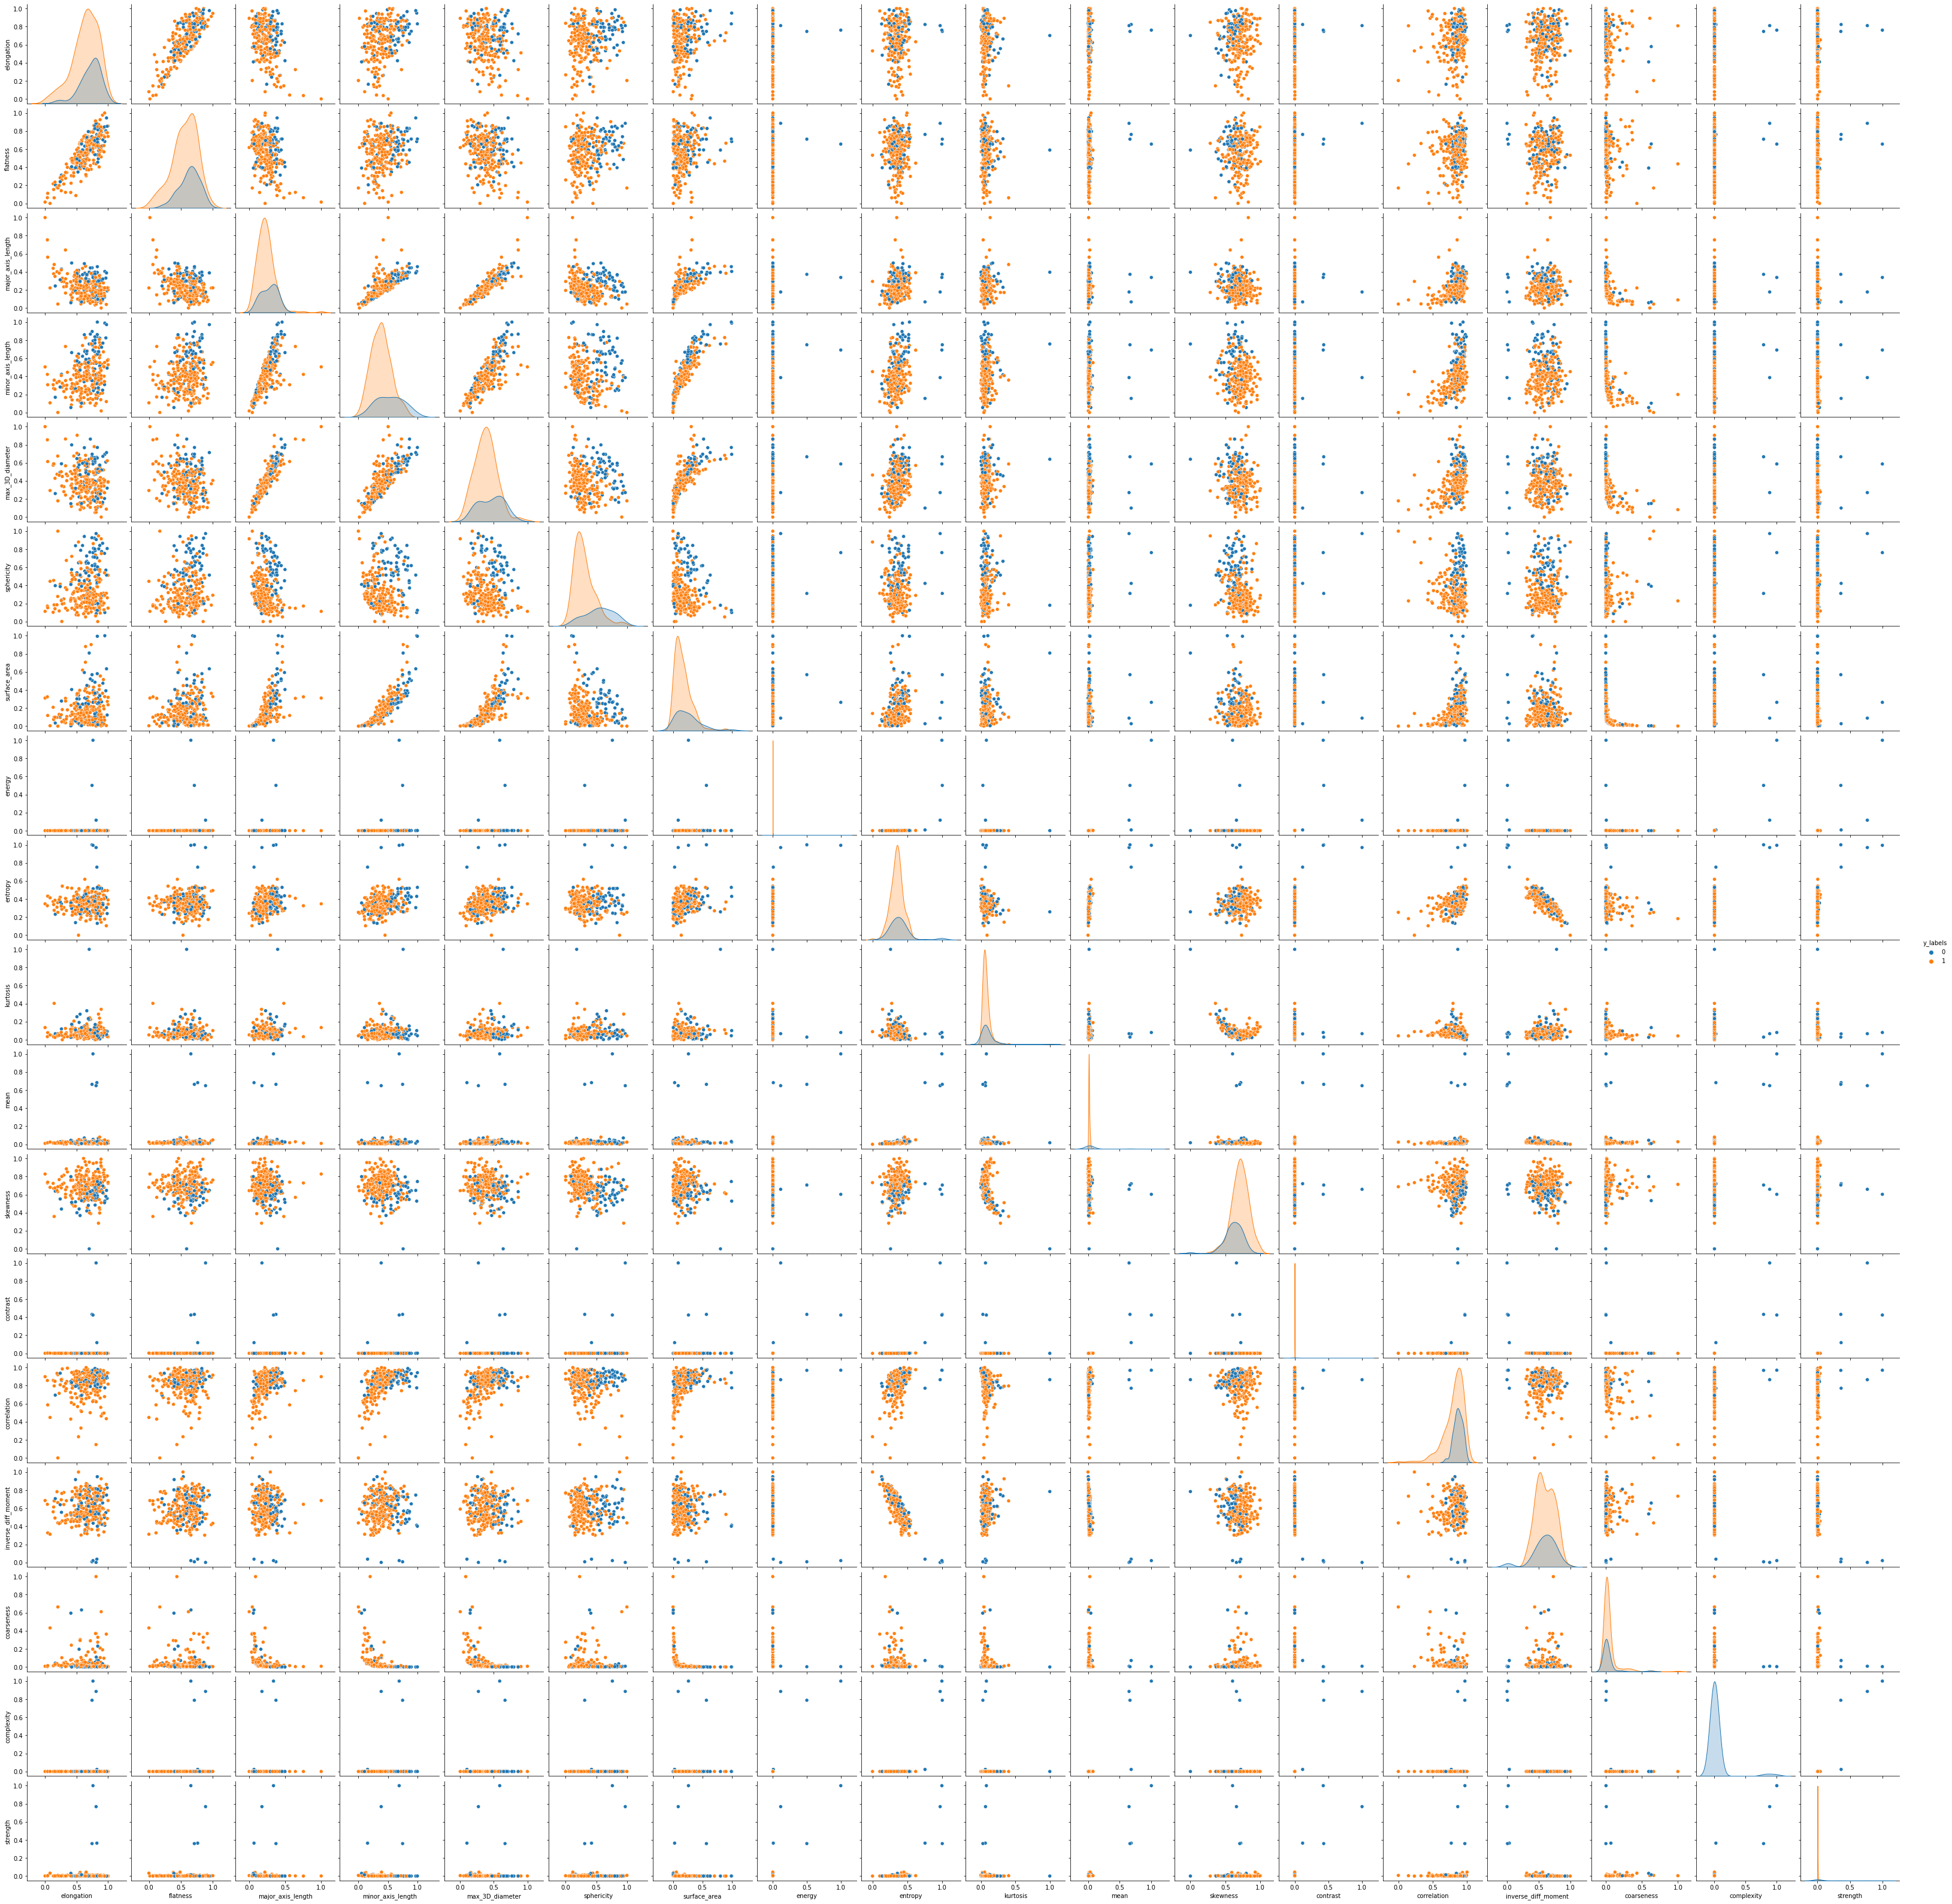

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(shuffled, hue = 'y_labels')
plt.show()

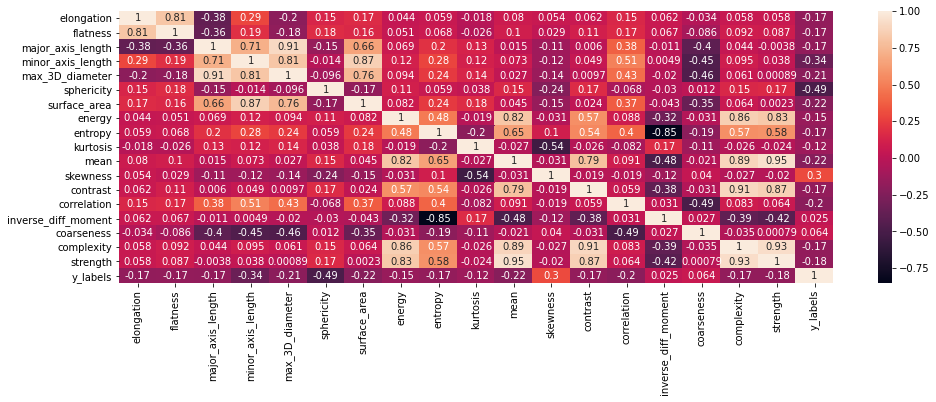

In [10]:
plt.figure(figsize = (16,5))
sns.heatmap(shuffled.corr(), annot = True)

In [11]:
# split feature matrix into training(80%)and testing(20%)
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(shuffled.loc[:, 'elongation':'strength'], np.ravel(shuffled[['y_labels']]),
                                                   test_size = 0.2, random_state = 42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(228, 18)
(57, 18)
(228,)
(57,)


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
rf_mod = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state= 10, verbose= 1)
rf_mod.fit(X_train, y_train)

print("Train score: ",rf_mod.score(X_train, y_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train score:  1.0


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [14]:
# prediction on test data
pred_rf = rf_mod.predict(X_test)
print('Test score:',rf_mod.score(X_test, y_test))

Test score: 0.8771929824561403


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [15]:
# classification report using random forest
print("Classification report: ",classification_report(pred_rf,y_test))
print("Average weighted precision: ",precision_score(y_test,pred_rf))
print("Average weighted recall: ",recall_score(y_test,pred_rf))
print("Average weighted f1 score: ",f1_score(y_test,pred_rf))

Classification report:                precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.95      0.89      0.92        46

    accuracy                           0.88        57
   macro avg       0.80      0.85      0.82        57
weighted avg       0.89      0.88      0.88        57

Average weighted precision:  0.8913043478260869
Average weighted recall:  0.9534883720930233
Average weighted f1 score:  0.9213483146067417


In [16]:
lg_mod = LogisticRegression()
lg_mod.fit(X_train, y_train)

print("Train score: ",lg_mod.score(X_train, y_train))

Train score:  0.8640350877192983


In [17]:
pred_lg = lg_mod.predict(X_test)
print('Test score:',lg_mod.score(X_test, y_test))

Test score: 0.8771929824561403


In [18]:
print("Classification report: ",classification_report(pred_lg,y_test))
print("Average weighted precision: ",precision_score(y_test,pred_lg))
print("Average weighted recall: ",recall_score(y_test,pred_lg))
print("Average weighted f1 score: ",f1_score(y_test,pred_lg))

Classification report:                precision    recall  f1-score   support

           0       0.57      0.89      0.70         9
           1       0.98      0.88      0.92        48

    accuracy                           0.88        57
   macro avg       0.77      0.88      0.81        57
weighted avg       0.91      0.88      0.89        57

Average weighted precision:  0.875
Average weighted recall:  0.9767441860465116
Average weighted f1 score:  0.923076923076923


In [19]:
"""**Gradient Boosting:**

The Gradient Boosting classifier, an ensemble technique, is based on the idea of creating several weak learners (A learner which is slightly better than random chance) to minimize loss of the model via a gradient descent like procedure. Every learner learns on a different diffcult pattern and together a majority vote predicts the target class.
"""

gb_mod = GradientBoostingClassifier(n_estimators=200, random_state= 10)
gb_mod.fit(X_train, y_train)

print("Train score: ",gb_mod.score(X_train, y_train))

Train score:  1.0


In [20]:
pred_gb = gb_mod.predict(X_test)
print('Test score:',gb_mod.score(X_test, y_test))

Test score: 0.8070175438596491


In [21]:
print("Classification report: ",classification_report(pred_gb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_gb))
print("Average weighted recall: ",recall_score(y_test,pred_gb))
print("Average weighted f1 score: ",f1_score(y_test,pred_gb))

Classification report:                precision    recall  f1-score   support

           0       0.71      0.59      0.65        17
           1       0.84      0.90      0.87        40

    accuracy                           0.81        57
   macro avg       0.78      0.74      0.76        57
weighted avg       0.80      0.81      0.80        57

Average weighted precision:  0.9
Average weighted recall:  0.8372093023255814
Average weighted f1 score:  0.8674698795180723


In [22]:
"""**Gaussian Naive Bayes:**
Naive Bayes is a simple algorthim, that can predict the relative probability of a target class and thus classify them. It uses the Bayes theorem to calculate the probability of an input data point belonging to a target class [ P(target class|input) ]. It assumes there exist no correlation between the features and thus is Naive.
"""

gnb_mod = GaussianNB()
gnb_mod.fit(X_train, y_train)

print("Train score: ",gnb_mod.score(X_train, y_train))

Train score:  0.7456140350877193


In [23]:
pred_nb = gnb_mod.predict(X_test)
print('Test score:',gnb_mod.score(X_test, y_test))

Test score: 0.8070175438596491


In [24]:
print("Classification report: ",classification_report(pred_nb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_nb))
print("Average weighted recall: ",recall_score(y_test,pred_nb))
print("Average weighted f1 score: ",f1_score(y_test,pred_nb))

Classification report:                precision    recall  f1-score   support

           0       0.21      1.00      0.35         3
           1       1.00      0.80      0.89        54

    accuracy                           0.81        57
   macro avg       0.61      0.90      0.62        57
weighted avg       0.96      0.81      0.86        57

Average weighted precision:  0.7962962962962963
Average weighted recall:  1.0
Average weighted f1 score:  0.8865979381443299


In [25]:
"""**Multi-Layer Perceptron:**
A Multi-Layer Perceptron classifier is a neural network classifier that applies the Error Back Propogation Training (EBPT) algorithm to learn weights for the network that suitably classify the input pattern space to target classes.
"""

mlp_mod = MLPClassifier(hidden_layer_sizes=[100,50])
mlp_mod.fit(X_train, y_train)

print("Train score: ",mlp_mod.score(X_train, y_train))

Train score:  0.9035087719298246


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [26]:
pred_mlp = mlp_mod.predict(X_test)
print('Test score:',mlp_mod.score(X_test, y_test))

Test score: 0.8421052631578947


In [27]:
print("Classification report: ",classification_report(pred_mlp,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_mlp))
print("Average weighted recall: ",recall_score(y_test,pred_mlp))
print("Average weighted f1 score: ",f1_score(y_test,pred_mlp))

Classification report:                precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.91      0.89      0.90        44

    accuracy                           0.84        57
   macro avg       0.77      0.79      0.78        57
weighted avg       0.85      0.84      0.84        57

Average weighted precision:  0.8863636363636364
Average weighted recall:  0.9069767441860465
Average weighted f1 score:  0.896551724137931


In [28]:
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
modelBagging = BaggingClassifier()
# fit the model on the whole dataset
#model.fit(X, y)
modelBagging.fit(X_train, y_train)

print("Train score: ",modelBagging.score(X_train, y_train))

Train score:  0.9912280701754386


In [29]:
modelBaggingpred = modelBagging.predict(X_test)
print('Test score:',modelBagging.score(X_test, y_test))

Test score: 0.8421052631578947


In [30]:
print("Classification report: ",classification_report(modelBaggingpred,y_test))

print("Average weighted precision: ",precision_score(y_test,modelBaggingpred))
print("Average weighted recall: ",recall_score(y_test,modelBaggingpred))
print("Average weighted f1 score: ",f1_score(y_test,modelBaggingpred))

Classification report:                precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.88      0.90      0.89        42

    accuracy                           0.84        57
   macro avg       0.80      0.79      0.79        57
weighted avg       0.84      0.84      0.84        57

Average weighted precision:  0.9047619047619048
Average weighted recall:  0.8837209302325582
Average weighted f1 score:  0.8941176470588236


In [31]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()

ExtraTreesClassifier.fit(X_train, y_train)

print("Train score: ",ExtraTreesClassifier.score(X_train, y_train))

Train score:  1.0


In [32]:
ExtraTreesClassifiermodel= ExtraTreesClassifier.predict(X_test)
print('Test score:',ExtraTreesClassifier.score(X_test, y_test))

Test score: 0.8596491228070176


In [33]:
print("Classification report: ",classification_report(ExtraTreesClassifiermodel,y_test))

print("Average weighted precision: ",precision_score(y_test,ExtraTreesClassifiermodel))
print("Average weighted recall: ",recall_score(y_test,ExtraTreesClassifiermodel))
print("Average weighted f1 score: ",f1_score(y_test,ExtraTreesClassifiermodel))

Classification report:                precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.91      0.91      0.91        43

    accuracy                           0.86        57
   macro avg       0.81      0.81      0.81        57
weighted avg       0.86      0.86      0.86        57

Average weighted precision:  0.9069767441860465
Average weighted recall:  0.9069767441860465
Average weighted f1 score:  0.9069767441860465


In [34]:
no_skill_prob = [0 for _ in range(len(y_test))]
no_skill_auc = roc_auc_score(y_test, no_skill_prob)
print("No Skill AUC: ", no_skill_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_skill_prob)

No Skill AUC:  0.5


In [35]:
# Random Forest
rf_prob = rf_mod.predict_proba(X_test)[:,-1]
rf_auc = roc_auc_score(y_test,rf_prob)
print("RandomForest AUC: ", rf_auc)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

RandomForest AUC:  0.8870431893687708


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [36]:
# Gussian Naive Bayes
nb_prob = gnb_mod.predict_proba(X_test)[:,-1]
nb_auc = roc_auc_score(y_test, nb_prob)
print("Gaussian Naive Bayes AUC: ", nb_auc)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)

Gaussian Naive Bayes AUC:  0.8014950166112956


In [37]:
# gradient boosting
gb_prob = gb_mod.predict_proba(X_test)[:,-1]
gb_auc = roc_auc_score(y_test, gb_prob)
print("GradientBoosting AUC: ", gb_auc)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_prob)

GradientBoosting AUC:  0.8654485049833888


In [38]:
# Multi-Layer perceptron
mlp_prob = mlp_mod.predict_proba(X_test)[:,-1]
mlp_auc = roc_auc_score(y_test, mlp_prob)
print("MultiLayer Perceptron AUC: ", mlp_auc)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_prob)

MultiLayer Perceptron AUC:  0.8205980066445182


In [39]:
# Bagging tree
bg_prob = modelBagging.predict_proba(X_test)[:,-1]
bg_auc = roc_auc_score(y_test, bg_prob)
print("Bagging Tree AUC: ", bg_auc)
bg_fpr, bg_tpr, _ = roc_curve(y_test, bg_prob)

Bagging Tree AUC:  0.872093023255814


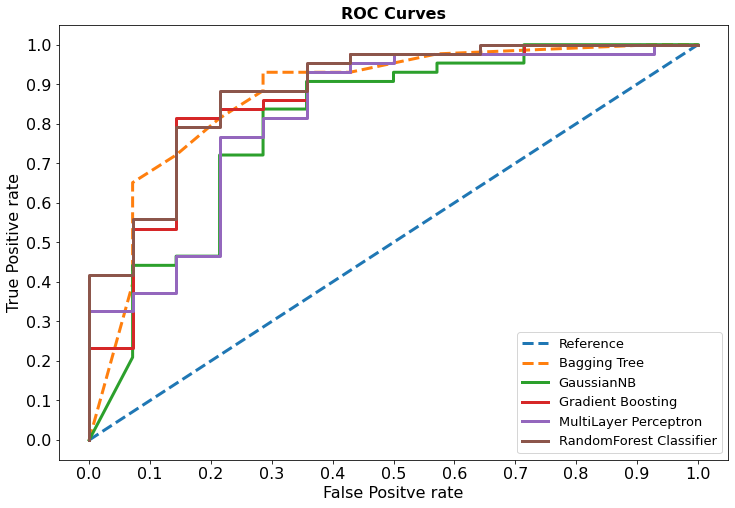

In [40]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(ns_fpr, ns_tpr, linestyle= '--', linewidth=3.0,label= 'Reference')
#ax.plot(rf_fpr, rf_tpr, linestyle= '-', linewidth=3.0,label= 'LSTM Classifier')
ax.plot(bg_fpr, bg_tpr, linestyle= '--', linewidth=3.0,label= 'Bagging Tree')
#ax.plot(LR8_fpr, LR8_tpr, linestyle='-', label= 'LogisticRegression')
ax.plot(nb_fpr, nb_tpr, linestyle='-', linewidth=3.0,label= 'GaussianNB')
ax.plot(gb_fpr, gb_tpr, linestyle='-',linewidth=3.0, label= 'Gradient Boosting')
ax.plot(mlp_fpr, mlp_tpr, linestyle='-', linewidth=3.0,label= 'MultiLayer Perceptron')
#ax.plot(ET8_fpr, ET8_tpr, linestyle='-', label= 'Extra Trees Classifier')
ax.plot(rf_fpr, rf_tpr, linestyle='-',linewidth=3.0, label= 'RandomForest Classifier')
plt.xticks(np.arange(0.0, 1.1, step=0.1),fontsize=16)
plt.xlabel('False Positve rate',fontsize=16)
plt.yticks(np.arange(0.0, 1.1, step=0.1),fontsize=16)
plt.ylabel('True Positive rate',fontsize=16)
#plt.title('ROC curve')
plt.title('ROC Curves', fontweight='bold', fontsize=16)
#plt.xlim([0,0.6])
#plt.ylim([0.9,1])
plt.legend(prop={'size':13}, loc='lower right')
#ax.legend(loc="bottom right",fontweight='bold')
plt.savefig('rocc.png',dpi=100)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


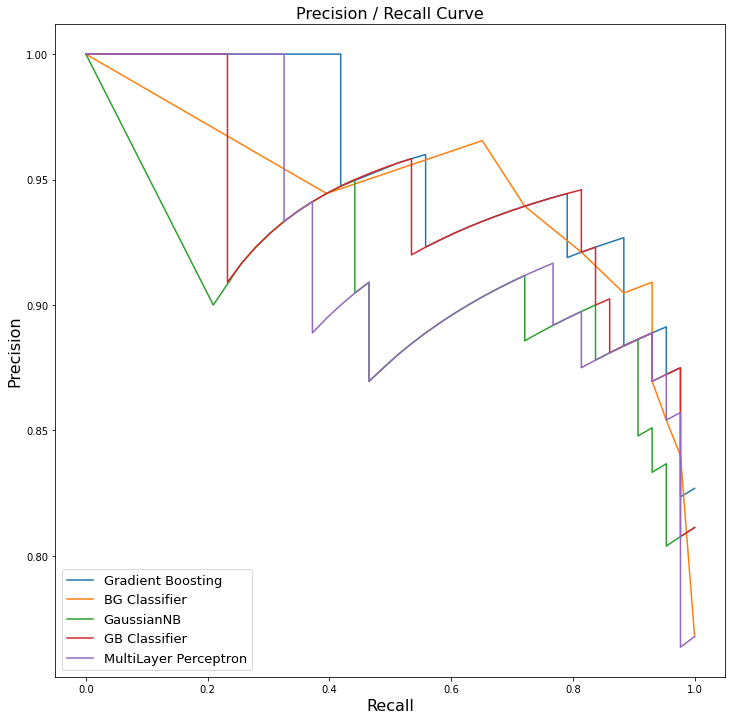

In [41]:
rf_prob = rf_mod.predict_proba(X_test)[:,-1]

nb_prob = gnb_mod.predict_proba(X_test)[:,-1]

gb_prob = gb_mod.predict_proba(X_test)[:,-1]

mlp_prob = mlp_mod.predict_proba(X_test)[:,-1]


bg_prob = modelBagging.predict_proba(X_test)[:,-1]



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score, precision_recall_curve
from IPython.display import display

def plot_pr_curves(y_true, y_score_dict, size=(8, 5), average='weighted'):
    """
    Plots the precision-recall curve for a multiple estimators.
    :param y_true: True labels.
    :param y_score_dict: Dictionary containing the estimator name as keys and the predicted label probabilities
           as values.
    :param size: Size of the plot.
    :param average: Average parameter used for the calculation of the average precision score.
    :return: None
    """
    plt.figure(figsize=size)

    for name, y_score in y_score_dict.items():
        precisions, recalls, _ = precision_recall_curve(y_true, y_score)
        pr_auc = average_precision_score(y_true, y_score, average=average)
        plt.plot(recalls, precisions, label='{}'.format(name, pr_auc))

    plt.title('Precision / Recall Curve',fontsize=16)
    plt.xlabel('Recall',fontsize=16)
    plt.ylabel('Precision',fontsize=16)
    plt.legend(prop={'size':13},loc='lower left')
    plt.savefig('ROCs.png',dpi=100)


#################################################################LSTM #################################
plot_pr_curves(y_test, 
               {
                   'Gradient Boosting': rf_prob,
                   'BG Classifier': bg_prob,
                   'GaussianNB': nb_prob,
                   'GB Classifier': gb_prob,
                   'MultiLayer Perceptron': mlp_prob,
               }, 
               size=(12, 12))

In [42]:
#%%  submit results in table forms
rf_prob = rf_mod.predict_proba(X_test)[:,-1]
rf_auc = roc_auc_score(y_test,rf_prob)
print("RandomForest AUC: ", rf_auc)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)


nb_prob = gnb_mod.predict_proba(X_test)[:,-1]
nb_auc = roc_auc_score(y_test, nb_prob)
print("Gaussian Naive Bayes AUC: ", nb_auc)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)

gb_prob = gb_mod.predict_proba(X_test)[:,-1]
gb_auc = roc_auc_score(y_test, gb_prob)
print("GradientBoosting AUC: ", gb_auc)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_prob)

mlp_prob = mlp_mod.predict_proba(X_test)[:,-1]
mlp_auc = roc_auc_score(y_test, mlp_prob)
print("MultiLayer Perceptron AUC: ", mlp_auc)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_prob)


bg_prob = modelBagging.predict_proba(X_test)[:,-1]
bg_auc = roc_auc_score(y_test, bg_prob)
print("Bagging Tree AUC: ", bg_auc)
bg_fpr, bg_tpr, _ = roc_curve(y_test, bg_prob)

RandomForest AUC:  0.8870431893687708
Gaussian Naive Bayes AUC:  0.8014950166112956
GradientBoosting AUC:  0.8654485049833888
MultiLayer Perceptron AUC:  0.8205980066445182
Bagging Tree AUC:  0.872093023255814


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

models = {
    'Random Classifier':rf_mod, 
    'Extra Classifier': ExtraTreesClassifier,
    'Gaussian Naive Bayes': gnb_mod,
    'Gradient Boosting':gb_mod,
    'Multi-Layer Perceptron':mlp_mod,
    'Bagging Trees':modelBagging
    
}

columns = [
    'accuracy',
    'precision',
    'recall',
    'f1'
]

table = {}


for model in models.keys():
    
    pred = models[model].predict(X_test)
    accuracy = models[model].score(X_test,y_test)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    
    table[model] = [accuracy, precision, recall, f1]
    
results = pd.DataFrame.from_dict(table, orient='index')
results.columns = columns
results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


,accuracy,precision,recall,f1
Random Classifier,0.877193,0.891304,0.953488,0.921348
Extra Classifier,0.859649,0.906977,0.906977,0.906977
Gaussian Naive Bayes,0.807018,0.796296,1.000000,0.886598
Gradient Boosting,0.807018,0.900000,0.837209,0.867470
Multi-Layer Perceptron,0.842105,0.886364,0.906977,0.896552
Bagging Trees,0.842105,0.904762,0.883721,0.894118
